In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_boston 

load_boston = load_boston()

x = load_boston.data 
y = load_boston.target 

df = pd.DataFrame(x, columns=load_boston.feature_names) 
df["SalePrice"] = y 
df.head() 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,SalePrice
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
print(load_boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
df.shape

(506, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    float64
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    float64
 9   TAX        506 non-null    float64
 10  PTRATIO    506 non-null    float64
 11  B          506 non-null    float64
 12  LSTAT      506 non-null    float64
 13  SalePrice  506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


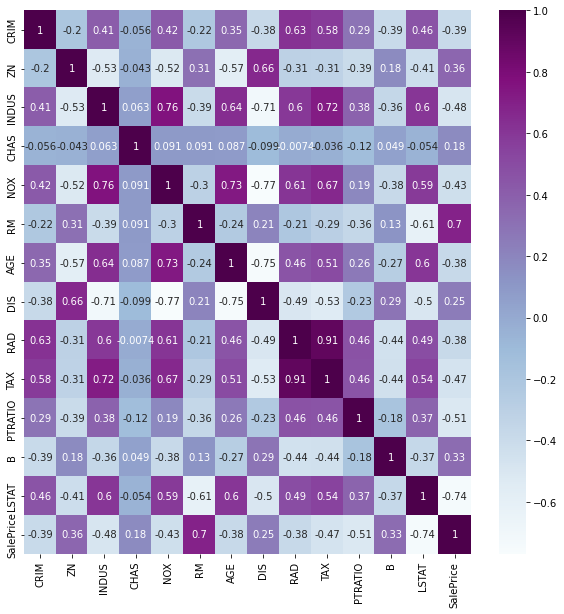

In [6]:
df.corr()
plt.figure(figsize=(10,10))
plot = sb.heatmap(df.corr(),cmap='BuPu',annot = True)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
x = df.iloc[:,:-1].values
y = df.loc[:,'SalePrice'].values

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state = 7)

li_reg = LinearRegression()

li_reg = li_reg.fit(x_train,y_train)

LinearRegression()

LinearRegression()

In [10]:
intercept = li_reg.intercept_
coefficients = li_reg.coef_

print('intercept:', li_reg.intercept_)
print('coefficients:', li_reg.coef_)

intercept: 23.956746017565717
coefficients: [-1.29372986e-01  2.95904870e-02  2.22928425e-02  2.83744579e+00
 -1.53954203e+01  5.27557273e+00 -1.05383841e-02 -1.30170765e+00
  2.66392896e-01 -1.09686702e-02 -9.64830193e-01  1.08603361e-02
 -3.78363465e-01]


In [11]:
print('r-squared: ', li_reg.score(x_train, y_train))
print('r-squared: ', li_reg.score(x_test, y_test))

r-squared:  0.7666470212195009
r-squared:  0.6170003090082032


In [12]:
y_predicted = li_reg.predict(x_test)
mse=mean_squared_error(y_test,y_predicted)
rmse = np.sqrt(mean_squared_error(y_test, y_predicted))
print(f" Mean squared error :{mse}'\n'Root Mean squared error: {rmse}")

 Mean squared error :29.515137790197734'
'Root Mean squared error: 5.432783613415662


In [13]:
x = np.array(df.iloc[:,:-1])
y = np.array( df.loc[:,'SalePrice'])

In [14]:
x.shape

(506, 13)

In [15]:
print(x)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [16]:
y.shape

(506,)

In [17]:
print(y)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [19]:
from sklearn.linear_model import Ridge

x = np.array(df.iloc[:,:-1])
y = np.array( df.loc[:,'SalePrice'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=7)

rr = Ridge(alpha = 1.0)
rr.fit(x_train,y_train)
Ridge()

Ridge()

In [20]:
print('Ridge intercept:', rr.intercept_)
print('Ridge coefficients:', rr.coef_)

Ridge intercept: 17.912438125044297
Ridge coefficients: [-0.10457782  0.02995856 -0.01071037  2.69707555 -7.93954232  5.38761916
 -0.01666562 -1.19655465  0.23897281 -0.01135577 -0.86739481  0.01205502
 -0.39359137]


In [23]:
print('r-squared for test set: ', rr.score(x_test, y_test))
print('r-squared for train set: ', rr.score(x_train, y_train))

r-squared for test set:  0.643931330859861
r-squared for train set:  0.7594069113907516


In [24]:
x = df.iloc[:,:-1]
y = df.loc[:,'SalePrice']
y=y.astype('int')


print(f'shape of x : {x.shape}')
print(f'shape of y : {y.shape}')

shape of x : (506, 13)
shape of y : (506,)


In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
x_ = scaler.fit_transform(x)
x = pd.DataFrame(x_, columns=x.columns)


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest



x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=7)


fes = SelectKBest(score_func=chi2, k= 'all' )
chi_fes = fes.fit_transform(x_train,y_train)
x_train = fes.transform(x_train)
x_test = fes.transform(x_test)


print(f'shape of x_train : {x_train.shape}')
print(f'shape of x_test : {x_test.shape}')
print(f'shape of y_train : {y_train.shape}')
print(f'shape of y_test : {y_test.shape}')

shape of x_train : (354, 13)
shape of x_test : (152, 13)
shape of y_train : (354,)
shape of y_test : (152,)


In [27]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha = 2.0)
rr.fit(x_train,y_train)

print('Ridge intercept:', rr.intercept_)
print('Ridge coefficients:', rr.coef_) 

train_score = rr.score(x_train, y_train)
test_score = rr.score(x_test, y_test)

print(f'R2 score on training set for Ridge Regression {train_score}')
print(f'R2 score on testing set for Ridge Regression {test_score}')

y_predicted = li_reg.predict(x_test)
mse=mean_squared_error(y_test,y_predicted)
rmse = np.sqrt(mean_squared_error(y_test, y_predicted))
print(f" Mean squared error :{mse}'\n'Root Mean squared error: {rmse}")

Ridge intercept: 21.867210393550508
Ridge coefficients: [ -3.48749109   2.02712553  -0.8246523    3.32536001  -5.09717504
  21.30462106  -0.08114632  -9.27662604   3.62337626  -4.13643544
  -8.49796375   4.04506416 -15.24472021]
R2 score on training set for Ridge Regression 0.7482123004480781
R2 score on testing set for Ridge Regression 0.6570162072152759
 Mean squared error :54.454226328759766'
'Root Mean squared error: 7.379310694689563


In [28]:
from sklearn.linear_model import LinearRegression

li_reg = LinearRegression()

li_reg = li_reg.fit(x_train,y_train)


print('intercept:', rr.intercept_)
print('coefficients:', rr.coef_)

train_score = rr.score(x_train, y_train)
test_score = rr.score(x_test, y_test)

print(f'R2 score on training set for Linear Regression {train_score}')
print(f'R2 score on testing set for Linear Regression {test_score}')

y_predicted = li_reg.predict(x_test)
mse=mean_squared_error(y_test,y_predicted)
rmse = np.sqrt(mean_squared_error(y_test, y_predicted))
print(f" Mean squared error :{mse}'\n'Root Mean squared error: {rmse}")

intercept: 21.867210393550508
coefficients: [ -3.48749109   2.02712553  -0.8246523    3.32536001  -5.09717504
  21.30462106  -0.08114632  -9.27662604   3.62337626  -4.13643544
  -8.49796375   4.04506416 -15.24472021]
R2 score on training set for Linear Regression 0.7482123004480781
R2 score on testing set for Linear Regression 0.6570162072152759
 Mean squared error :26.701571947500067'
'Root Mean squared error: 5.167356378991105


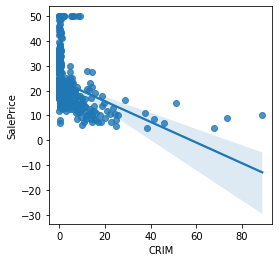

In [29]:
plt.figure(figsize=(4,4))
sb.regplot(data=df, x='CRIM',y='SalePrice')
plt.show()

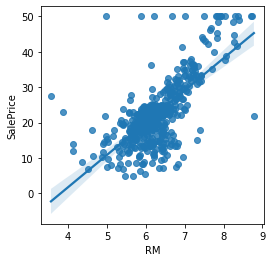

In [30]:
plt.figure(figsize=(4,4))
sb.regplot(data=df, x='RM',y='SalePrice')
plt.show()